In [1]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plot

import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate

import itertools
from itertools import product
import seaborn as sns
import json
import sklearn
from sklearn import linear_model
from sklearn import ensemble

## Градиентный бустинг, регрессия / классификация

In [2]:
DATA = np.genfromtxt('wineq.csv',delimiter=';')
ERRORS = []

for ttt in range (1,20) :
    np.random.shuffle (DATA)

    T = DATA[int (0.8*len(DATA)):]
    A = DATA[:int (0.8*len(DATA))]

    Tp = [[row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],row[9],row[10]] for row in T]
    Ta = T[:,11]

    Ap = [[row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],row[9],row[10]] for row in A]
    Aa = A[:,11]
        
    MODEL = ensemble.GradientBoostingClassifier(n_estimators = 8, max_depth = 1).fit(Tp, Ta)
    PRED = MODEL.predict (Ap)
    
    ERRORS.append (math.sqrt(sklearn.metrics.mean_squared_error (Aa, PRED)))
    

print (sum(ERRORS)/float(len(ERRORS)))

0.7836470147783697


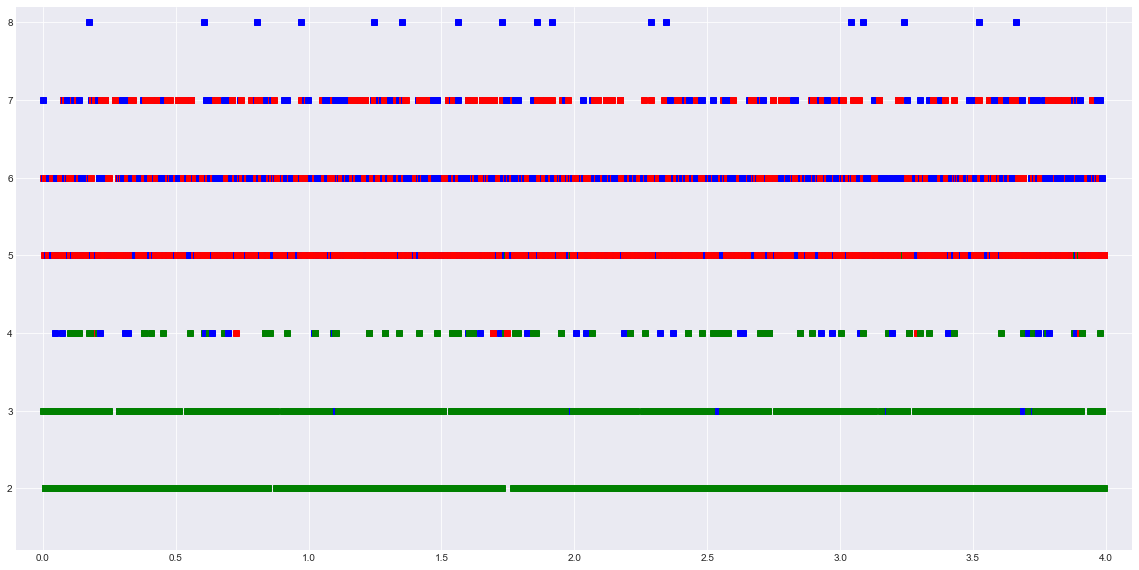

In [3]:
sns.set_style("darkgrid")
figsize = (20,10)
legend_fontsize = 13
sns.set_palette("colorblind")
palette = sns.color_palette()

fig = plot.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim(-0.1,4.1)
ax.set_ylim(1.2,8.2)

for i in range (0,(len(PRED)-1)):
    ax.plot(4*i/len(PRED), Aa[i], 'bs')
    ax.plot(4*i/len(PRED), PRED[i], 'rs')
    ax.plot(4*i/len(PRED), math.sqrt((Aa[i]-PRED[i])*(Aa[i]-PRED[i]))+2 , 'gs')
    
plot.show()